# AA Project

By Enric Millán and Juan Pablo Zaldivar

# 0. Importing Libraries

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
from scipy.stats import boxcox
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.genmod.generalized_linear_model import GLM
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

# 1. Introduction

En el presente proyecto se trabajará con un dataset real, para el cual se le aplicarán conceptos propios de la metodología de modelos, dentro del área de _Machine Learning_. Desde la lectura y preprocesado de los datos, hasta la generación de un modelo final y la evaluación de su calidad de predicción.

## 1.1 Dataset Statement

El dataset propuesto para este proyecto es de **League of Legends**, el cual contiene una colección de datos relacionados con partidas jugadas en el popular videojuego multijugador en línea en el servidor de norte América durante la temporada de 2020 y para el rango de *Diamante*.

Tal y como se explica en la página oficial de Wikipedia, **League of Legends** (LoL) es un videojuego multijugador en línea de estrategia en tiempo real y de género MOBA (*Multiplayer Online Battle Arena*).En el juego, dos equipos de cinco jugadores luchan en un combate jugador contra jugador, cada equipo ocupando y defendiendo su mitad del mapa. Cada uno de los diez jugadores controla un personaje, conocido como "campeón", con habilidades únicas y diferentes estilos de juego. Durante una partida, los campeones se vuelven más poderosos acumulando puntos de experiencia y ganando oro que se emplea para la compra de artículos para derrotar al equipo contrario. En el modo principal de juego de LoL, League, "La Grieta del Invocador", un equipo gana al abrirse paso hasta la base enemiga y destruir su "nexo", una gran estructura ubicada dentro de la cual se emanan tres líneas de súbditos o "minions", personajes no jugadores que al ser eliminados por el equipo enemigo otorgan oro y experiencia.

## 1.2 Objective

En este proyecto se pretende analizar los datos de las partidas de **League of Legends** para intentar predecir su desenlace mediante el desarrollo de modelos propios de *Machine Learning*. Además de analizar que factores tienen más importancia en los 10 primeros minutos a la hora de que uno de los dos equipos gane la partida.

## 1.3 Motivation

**League of Legends** es uno de los videojuegos más populares y competitivos del mundo, con millones de jugadores en todo el mundo. Dada su creciente popularidad, es un juego que consta de un nivel internacional muy alto, de hasta un total de casi 44 millones de espectadores simultáneos en 2019. (CITA)

En consecuencia, el análsis de los datos estadísticos puede suponer una ventaja competitiva para los jugadores profesionales, ya que les permite mejorar su rendimiento y su estrategia de juego. Con lo que un tratamiento y modelización de los datos adecuados en vista del mundo de los _eSports_ puede ser muy útil. Por lo que hemos creído interesante estudiar datos de los **10 primeros minutos** de casi 10,000 partidas del rango Diamante (uno de los rangos más altos por nivel de jugador) supondría un buen punto de partida y un reto interesante para el proyecto.

# 2. Data

Los datos en formato csv han sido extraídos de la páguina web de [*Kaggle*](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download), habiendo sido distribuídos originalmente por *Riot Games* (empresa fundadora de League of Legends).

In [132]:
# Load the data
dataset = read_csv("league_dataset.csv", header=0, delimiter=',')
dataset.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


El dataset contiene información sobre aproximadamente 10,000 partidas, con variables relacionada a las partidas y ambos equipos. Las variables correspondientes al equipo rojo tienen el prefijo `blue` y las del equipo azul el prefijo `red`.

## 2.1 Data Description

In [133]:
dataset.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


A simple vista y aplicando conocimientos previos del juego hay algunos valores que parecen no encajar. Por ejemplo, para la variable *blueWardsPlaced* el valor máximo es de 250 (y para *redWardsPlaced* sucede algo similar con 276), valor que desentona ya que es un valor muy elevado incluso para partidas completas.

La única manera de llegar a esta cantidad en los 10 primeros minutos de partida implica que alguno o varios de los jugadores, potencialmente con rol de *Support*  (este rol suele adquirir un objeto que permite colocar más *Wards* de lo normal), esten jugando muy probablemente de forma errática con el propósito de alcanzar tal cantidad y no con el propósito de ganar la partida.

Otros dos valores que llaman la atención son los valores máximos de las diferencias de experiencia y oro (*blueGoldDiff*, *blueExperienceDiff* y sus contrapartes para el equipo rojo). Era de esperar que saliesen valores como estos ya que en partidas donde la diferencia de nivel es muy grande (cosa que debería pasar en pocos casos ya que las partidas se establecen con jugadores de rango similar) o como en el caso anterior, uno o varios jugadores de un equipo están jugando con objetivos diferentes de la victoria y estan dejando al equipo rival tomar ventaja. Estos casos se relacionan directamente con valores atípicamente bajos de oro y experiencia (*blueTotalGold* y *blueTotalExperience*) para ambos equipos como veremos más adelante.

Se volverán a analizar estos casos (si es necesario) en apartados posteriores ya que, como se ha argumentado, es muy probable que se trate de outilers. 

In [134]:
dataset.shape

(9879, 40)

Tras la lectura de los datos observamos que tenemos 9879 partidas, cada una de ellas con 40 columnas, las cuales representan las características de cada partida. La columna **blueWins** es la que nos indica si el equipo azul ha ganado la partida o no, por lo tanto será nuestra variable objetivo. 

La variable objetivo es una variable binaria, por lo que podemos calcular la proporción de partidas ganadas por el equipo azul y el equipo rojo para comprobar que nuestro dataset está equilibrado, es decir, que el porcentaje de victorias azules debería ser aproximadamente del 50%.

In [135]:
W, L = dataset['blueWins'].value_counts()

In [136]:
# make a bar plot using plotly px for W and L
fig = px.bar(x=['Blue Wins', 'Red Wins'],
             y=[W, L],
             color=['Blue Wins', 'Red Wins'],
             color_discrete_sequence=['#440154', '#21918c'],
             text=[W, L])

fig.update_layout(title='Balance between the two classes',
                  xaxis_title='Wins',
                  yaxis_title='Count',
                  showlegend=False)
fig.show()
# save the plot
fig.write_image("Figures/2.1_target_v_balance.png")

In [137]:
print('Blue Wins: {} ({}%), Red Wins: {} ({}%)'.format(W,round(100*W/(W+L),2),L,round(100*L/(W+L),2)))

Blue Wins: 4949 (50.1%), Red Wins: 4930 (49.9%)


Como se observa, los datos sobre la variable objetivo están casi perfectamente balanceados, por lo que no habrá que preocuparse por ello. Pues cuando el dataset esta desbalanceado, es decir, cuando una de las clases tiene una proporción muy superior a la otra, los modelos de clasificación pueden estar sesgados hacia la clase mayoritaria, lo que puede llevar a un sesgo en los resultados y un desempeño pobre para la clase minoritaria.

## 2.2 Variable Description

Con respecto a las variables predictoras, podemos observar que tenemos 33 variables numéricas y 6 variables categóricas (existen otras variables que toman valores en un conjunto discreto y finito, pero de momento no consideramos que resulte útil tratarlas como categóricas).

In [138]:
dataset.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

Las variables categoricas son **blueFirstBlood**, **blueDragons** y **blueHeralds** (y sus contrapartes del equipo rojo). La primera variable indica si el equipo azul ha conseguido la primera sangre o no, mientras que la segunda y tercera indican si el equipo azul ha conseguido matar al dragon y al heraldo respectivamente (mirar sección 2.2.1 para definición de conceptos). En cuanto a los valores que toman estas variables, podemos observar que las tres variables toman valores binarios.

In [139]:
dataset['blueFirstBlood'].value_counts()

1    4987
0    4892
Name: blueFirstBlood, dtype: int64

In [140]:
dataset['blueDragons'].value_counts()

0    6303
1    3576
Name: blueDragons, dtype: int64

In [141]:
dataset['blueHeralds'].value_counts()

0    8022
1    1857
Name: blueHeralds, dtype: int64

Para los lectores no familiarizados al videojuego daremos una breve explicación de las variables del equipo azul. Las variables del equipo rojo son análogas a las del equipo azul, por lo que no se explicarán. 

- *blueWins* : esta variable indica si el equipo azul se ha alzado vencedor de la partida, es la variable que se quiere predecir (1 para victoria azul, 0 para victoria roja).

- *blueWardsPlaced* : indica el número de *wards* colocados por el equipo azul. Un *ward* aporta visión del mapa al equipo que lo coloca, por lo que puede suponer una ventaja táctica si se coloca apropiadamente.

- *blueWardsDestroyed* : indica el número de *wards* rojos destruidos por el equipo azul.

- *blueFirstBlood* : indica el equipo que ha hecho la primera sangre (primera *kill* o eliminación), 1 si ha sido el equipo azul, 0 si ha sido el equipo rojo.

- *blueKills* : indica el número total de *kills* o eliminaciones del equipo azul. Una *kill* se da cuando se elimina a uno de los jugadores rivales (tras ser eliminado se reaparece tras un cierto período de tiempo, por lo que no hay un límite de asesinatos).

- *blueAssists* : indica el número total de asistencias del equipo azul. Una asistencia se consigue cuando un jugador hace daño a un rival y en un corto periodo de tiempo ese rival es eliminado por otro jugador distinto (este consigue una *kill*).

- *blueDragons* : indica la cantidad de *Dragones* eliminados por el quipo azul. Por reglas del juego, en los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueHeralds* : indica la cantidad de *Heraldos* eliminados por el equipo azul. Tal y como sucede con los dragones, en los 10 primeros minutos solo es posible eliminar 1 como mucho.

- *blueTowersDestroyed* : indica el número de *torres* del equipo rojo (principales estructuras defensivas) destruídas por el equipo azul.

- *blueTotalGold* : indica el número total de oro conseguido por los integrantes del equipo azul. El oro permite comprar objetos que aportan ventajas y mejoran las estadísticas del jugador.

- *blueAvgLevel* : indica la media de nivel de los jugadores del equipo azul tras los 10 primeros minutos. Cada jugador sube de nivel con la *experiencia*, que se consigue eliminando *súbditos*, *monstruos* y jugadores enemigos entre otros.

- *blueTotalExperience* : indica la cantidad de experiencia total conseguida por el equipo azul. La experiencia permite subir de nivel al jugador y mejorar así sus habilidades y ataques.

- *blueTotalMinionsKilled* : indica la cantidad total de *minions* o *súbditos* eliminados por el equipo azul durante los 10 primeros minutos. Eliminar súbditos aporta tanto experiencia como oro.

- *blueTotalJungleMinionsKilled* : indica la cantidad de monstruos de la jungla eliminados por el equipo azul. Los monstruos de la jungla tienen una función similar a la de los súbditos, pero estos aportan más oro y experiencia al jugador del equipo con el rol de *jungla*.

Existen las variables que relacionan algunas de las ya explicadas (como, por ejemplo,*blueGoldDiff*), que en apartados posteriores serán explicadas para justificar su posible eliminación del dataset, y también están estas mismas variables para el equipo rojo.

#### 2.2.1 Glossary


- *Ward* : ítem que puede colocarse en el mapa para revelar una zona y aportar visión a tu equipo. Resulta muy útil a nivel táctico para controlar objetivos como Dragones o Heraldos.

- *Minion* o *Súbdito* : NPC (Non Playable Character) que pertenece a un equipo (aparecen la misma cantidad de súbditos para el equipo rojo y para el equipo azul). Cuando mueren aportan experiencia a los jugadores del equipo contrario cercanos, y oro exclusivamente al jugador enemigo que haya eliminado al súbidto.

- *Jungle Minion* o *Monstruo de la Jungla* : NPC que no pertenece a ningun equipo. Aporta oro y experiencia de la misma manera que los súbditos normales al ser eliminado, pero este oro y experiencia aumenta si el jugador que los elimina es que tiene el rol de *Jungla*. Según de que monstruo se trate también puede aportar potenciadores temporales al jugador que lo haya eliminado.

- *Dragones* : calificados como *Monstruos Épicos* aparecen en una zona concreta cada cierto tiempo (como se ha mencionado, en los primeros 10 minutos solo es posible eliminar a uno) del mapa y tiene mucha más vitalidad que los demás monstruos de la Jungla. Al ser eliminado por un equipo, además de aportar oro y experiencia a todos los miembros del equipo también les aporta un potenciador permanente que dura toda la partida y cuyos efectos varían según el tipo de dragón.

- *Heraldos* : también calificados como *Monstruos Épicos*, aparece en otra zona concreta del mapa cada cierto tiempo (solo es posible elimianr 1 durante los primeros 10 minutos) y aporta oro y experiencia al equipo que lo elimine, pero su principal utilidad es que tras ser eliminado el jugador que recoja su *ojo* podrá invocar al Herlado que actuará como un súbdito de gran tamaño y vida y que  si impacta contra estructuras enemigas (torres) causará un gran daño a estas.

- *Torres* : para ganar la partida se debe destruir el *Nexo* enemigo, y las torres son las estructuras defensivas que deben ser destruidas para poder llegar al *Nexo*. Destruir torres además de una ventaja táctica también aporta una gran cantidad de oro.

- *Nivel* : el nivel determina junto a los objetos el "poder" de un jugador. Todos los jugadores empiezan en nivel 1 al inicio de la partida y el nivel máximo es 18. Se sube de nivel con la experiencia conseguida por derrotar súbditos, jugadores rivales, etc.



# 3. Data Preprocessing

En este apartado se explicará el proceso de preprocesado de los datos, que consiste en la limpieza y transformación de los datos para que puedan ser utilizados por los modelos de Machine Learning propuestos en siguientes apartados. 

Los pasos para el preprocesado de los datos incluyen la eliminación de variables que no aportan información, el tratamiento de valores faltantes y atípicos, la transformación de ciertas variables y la estandarización y normalización de los datos.

## 3.1 Data Cleaning

### 3.1.1 Drop Columns

En base a las descripciones de las variables y los conocimientos previos sobre el videojuego, en este apartado se tratará de buscar dependencias y/o inconsistencias entre las variables a modo de eliminar las que no resulten útiles o sean redundantes.

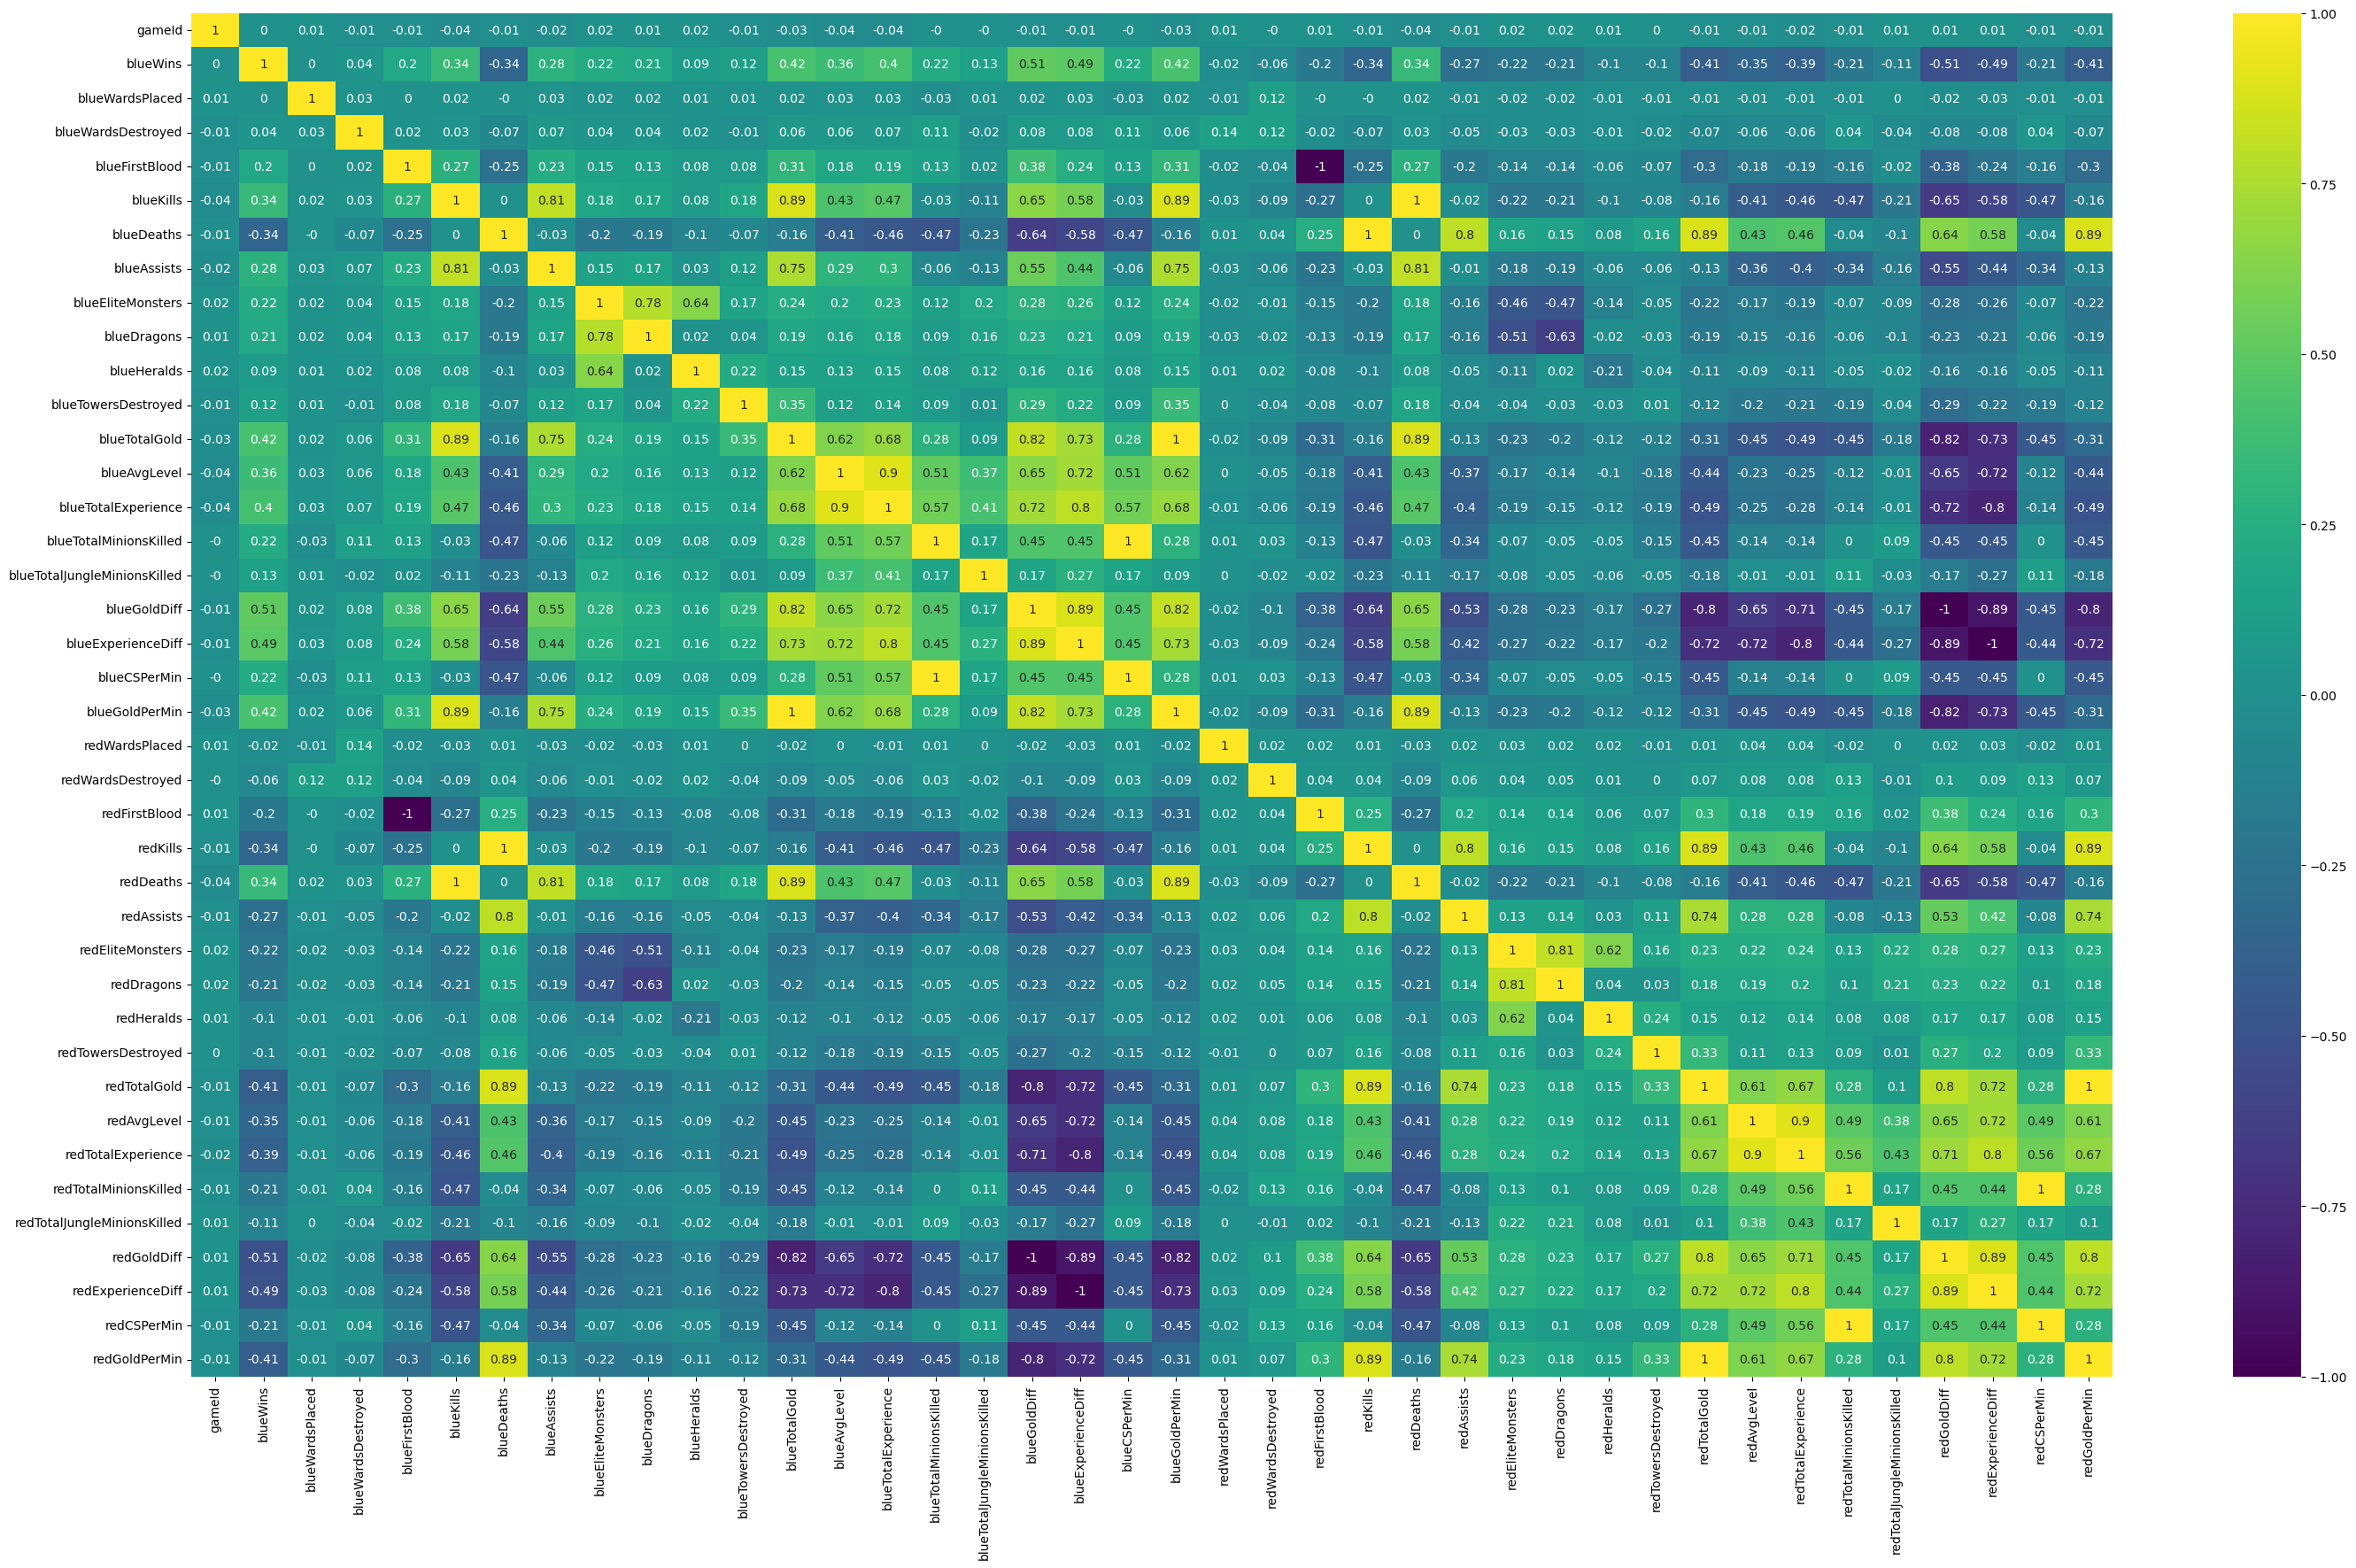

In [142]:
plt.figure(figsize=(35,20))
sns.heatmap(round(dataset.corr(),2), cmap='viridis', annot=True)
plt.show()

In [143]:
# # make a heatmap using plotly go
# fig = go.Figure(data=go.Heatmap(
#                         z=round(dataset.corr(),2),
#                         x=dataset.columns,
#                         y=dataset.columns,
#                         colorscale='Viridis'))

# fig.update_layout(title='Correlation between the features',
#                     xaxis_title='Features',
#                     yaxis_title='Features',
#                     width=1000,
#                     height=1000)
# fig.show()

Tras la descripción de las variables y el plot del *heatmap* podemos observar que hay correlación entre distintas variables.

En términos generales, se observa que hay correlación entre las variables que contienen la diferencia y el total, tanto para el equipo azul como para el equipo rojo. Por ejemplo, *blueGoldDiff* y *blueGoldTotal* están altamente correlacionadas, lo mismo ocurre con *blueExperienceDiff* y *blueExperienceTotal*. Como es de esperar, estas variables también presentan correlación entre ambos equipos, por ejemplo *blueGoldDiff* y *redGoldDiff*, así como las demás.

Las variables correspondientes al número de kills, asistencias y muertes de cada equipo también están correlacionadas, por ejemplo *blueKills* y *redDeaths*. Así como por consecuencia, las variables que contienen la diferencia entre ambos equipos también están correlacionadas, por ejemplo *blueKillsDiff* y *redDeathsDiff*. Un mayor numero de muertes corresponde también a una mayor ganancia de oro y experiencia, por lo que también están correlacionadas estas variables.

A continuación se mencionan algunas de las variables que se han eliminado del dataset por ser redundantes o no aportar información en base a los mismos criterios que se han explicado anteriormente:

- *gameId* : la variable actua como identificador de cada partida, algo que no tiene influencia sobre la propia partida y por lo tanto es irrelevante para el modelo.

- *redCSPerMin* : esta variable es completamente dependiente de *redTotalMinionsKilled*, pues su valor es el de esta última variable dividido entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *blueCSPerMin* : mismo caso que con *redCSPerMin*.

- *redGoldPerMin* y *blueGoldPerMin*: exactamente la misma situación que con las dos variables anteriores, sus valores son los de *redTotalGold* y *blueTotalGold* divididos entre 10 (minutos de partida transcurridos en el momento en el que se toman los datos).

- *redGoldDiff* : como estamos prediciendo si gana el equipo azul mantendremos *blueGoldDiff* (que tiene el mismo valor que *redGoldDiff* pero con signo contrario) ya que por el momento nos parece interesante enfatizar la importancia de la diferencia de este recurso en el juego.

- *redEliteMonsters* y *blueEliteMonsters* : estas variables son la suma de *redDragons* y *redHeralds*, y *blueDragons* y *blueHeralds* respectivamente, por lo que también son variables redundantes.

- *redExperienceDiff* : Como sucede con *redGoldDiff*, esta variable toma el mismo valor pero con signo contrario que su contraparte azul, y también como en el caso anterior, mantendremos *blueExperienceDiff* para representar y enfatizar la diferencia entre ambos equipos.

- *redDeaths* y *blueDeaths* : variables directamente ligadas a *blueKills* y *redKills*, por lo que son redundantes, como se menciona al inicio de este apartado.

- *blueTotalGold*, *blueTotalExperience*, *redTotalGold* y *redTotalExperience* : por el momento y aplicando conocimientos previos del juego, hemos decidido que en los 10 primeros minutos (y en general en toda la partida) es mucho más importante la diferencia de recursos y experiencia que la propia cantidad de recursos y experiencia, por lo que prescindiremos de estas variables manteniendo *blueGoldDiff* y *blueExperienceDiff*.

- *blueWardsDestroyed* y *redWardsDestroyed* : si bien colocar *wards* aporta visión sobre algunas zonas del mapa, eliminarlos o destruirlos lleva más tiempo (puesto que según el tipo, el *ward* debe ser golpeado hasta 4 veces y colocarlo, en cambio, es instantáneo) y tiene una influencia considerablemente menor que colocarlos.

- *redFirstBlood* : variable directamente ligada a *blueFirstBlood*, si esta última toma valor 1 el equipo azul ha hecho la primera sangre, si toma valor 0 el equipo rojo ha hecho la primera sangre. Podría darse el caso de que ninguno de los dos equipos haga la primera sangre, pero esto no es un escenario posible en el dataset, pues si ninguno de los dos equipos ha hecho la primera sangre, ambas variables toman valor 0 y como se comprueba a continuación, no hay ninguna partida en la que esto ocurra. En caso de que hubiese muestras como el caso último mencionado, crearíamos una nueva variable llamada *FirstBlood* que sería la diferencia entre *blueFirstBlood* y *redFirstBlood*: si toma valor 1, el equipo azul hizo la primera sangre, si toma valor -1 fue el equipo rojo, si toma valor 0, ninguno de los dos equipos ha hecho la primera sangre todavía.

In [144]:
len(dataset[(dataset['blueFirstBlood'] == 0) & (dataset['redFirstBlood'] == 0)])

0

Procedemos a limpiar el dataset:

In [145]:
drop_cols = ['gameId','blueCSPerMin','blueGoldPerMin','blueDeaths','blueEliteMonsters', 'blueWardsDestroyed', 'redWardsDestroyed',
             'redDeaths','redCSPerMin','redGoldDiff','redFirstBlood','redGoldPerMin','redEliteMonsters','redExperienceDiff', 'blueTotalGold', 
             'blueTotalExperience', 'redTotalGold', 'redTotalExperience']
dataset.drop(drop_cols, axis=1, inplace=True)
dataset.head(10)

,blueWins,blueWardsPlaced,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redKills,redAssists,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,1,9,11,0,0,0,6.6,195,36,643,-8,15,6,8,0,0,0,6.8,197,55
1,0,12,0,5,5,0,0,0,6.6,174,43,-2908,-1173,12,5,2,1,1,1,6.8,240,52
2,0,15,0,7,4,1,0,0,6.4,186,46,-1172,-1033,15,11,14,0,0,0,6.8,203,28
3,0,43,0,4,5,0,1,0,7.0,201,55,-1321,-7,15,5,10,0,0,0,7.0,235,47
4,0,75,0,6,6,0,0,0,7.0,210,57,-1004,230,17,6,7,1,0,0,7.0,225,67
5,1,18,0,5,6,1,0,0,7.0,225,42,698,101,36,3,2,0,0,0,7.0,221,59
6,1,18,1,7,7,1,0,0,6.8,225,53,2411,1563,57,6,9,0,0,0,6.4,164,35
7,0,16,0,5,3,0,0,0,6.4,209,48,-2615,-800,15,13,11,1,0,0,6.6,157,54
8,0,16,0,7,8,0,0,0,7.2,189,61,-1979,-771,15,7,5,1,1,0,7.2,240,53
9,1,13,1,4,5,1,0,0,6.8,220,39,-1548,-1574,16,5,4,0,0,0,6.8,247,43


Tras la limpieza del dataset, el mismo queda con 26 variables y 9879 observaciones.

### 3.1.2 Missing Values

Tras haber hecho una primera limpieza del dataset y a pesar de que en *Kaggle* se indica que el dataset no tiene *Missing Values*, ya que son datos empíricos que se recolectan en todas la partidas por la propia empresa desarrolladora (*Riot Games*) (y de que no hay posibilidad de que "no existan" NO ENTENDO), haremos una breves comprobaciones para confirmar este hecho.

In [146]:
dataset.isnull().sum().sum()

0

Como podemos observar en la tabla anterior, no tenemos ningún valor nulo en nuestro dataset, por lo que no será necesario realizar ningún tratamiento de valores nulos.

In [147]:
dataset.isna().sum().sum()

0

Tampoco existen valores *Na* que puedan afectar a los futuros modelos.

In [148]:
print(dataset[dataset.eq("-").any(1)].count().sum(),
      dataset[dataset.eq("#").any(1)].count().sum(),
      dataset[dataset.eq("?").any(1)].count().sum(),
      dataset[dataset.eq(" ").any(1)].count().sum(),
      ) 

0 0 0 0


Probando con otras posibles configuraciones para *Missing Values* confirmamos nuestra suposición.

### 3.1.3 Outlier treatment

Con el análisis inicial ya nos hemos hehco una idea de donde podría haber outliers o observaciones atípicas. Para dar un contetxo más visual y poder detectar posibles outliers en otras variables haremos un *boxplot* de estas. 

No se tiene en cuenta variables como *blueTotalMinionsKilled* y *blueTotalJungleMinionsKilled* entre otras varias ya que son variables que si pueden fluctuar más sin tener necesariamente un sentido negativo (en cuánto a outliers se refiere) que no se pueda identificar ya con otras variables; por ejemplo, si hay jugadores del equipo azul inactivos en la partida y *blueTotalMinionsKilled* es muy reducida, este efecto se verá reflejado también en la diferencia de oro entre ambos equipos, ya que los *minions* o súbditos son una de las fuentes principales de oro. 

Otros casos que no se tendrán en cuenta son variables como *blueAssists* ya que dependen más del estilo de juego de cada equipo (si un equipo juega buscando las llamadas *teamfights* en lugar de peleas individuales o más reducidas, implica que todos los jugadores participan en las peleas de forma conjunta, por tanto, por cada *kill* que hagan es muy probable que surjan 3 o 4 asistencias que inflen este conatdor) que puede ser muy variado según la partida y más teniendo en cuenta que los juagdores no pueden comunicarse más allá de con un chat de texto y algunas indicaciones audiovisuales que ofrece el propio juego.

In [149]:
columns=['blueWardsPlaced','blueKills', 'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced','redKills']
colors = px.colors.sequential.Viridis

# do a subplot for each value in columns using plotly px
fig = make_subplots(rows=2, cols=3, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(y=dataset[col], name=col,
                        marker_color=colors[i],
                        # set criteria for outliers
                        boxpoints='outliers',
                        # set the outlier marker
                        marker=dict(size=4, symbol='x')
                        ),
                    row=int(i/3)+1,
                    col=i%3+1
                    )
                
fig.update_layout(title='Boxplots for the features',
                    width=1000,
                    height=1000)
fig.show()


Para descartar los posibles outliers usaremos principalmente la distancia entre cuartiles, definiendo concretamente los outliers de la siguiente manera:

- Los valores más pequeños que Q1-1.5*IQR

- Los valores más grandes que Q3+1.5*IQR

In [150]:
Q1 = dataset['blueGoldDiff'].quantile(0.25)
Q3 = dataset['blueGoldDiff'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['blueGoldDiff'] < (Q1 - 1.5 * IQR)
big_outliers = dataset['blueGoldDiff'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(50, 77)

Con este métodod detectamos 127 outliers para la variable *blueGoldDiff*, es decir, una cantidad que representa aproximadamente un 1% del dataset, por lo que no supone un problema elimnarla de este mismo.

In [151]:
dataset = dataset[~(small_outliers | big_outliers)]

In [152]:
Q1 = dataset['blueExperienceDiff'].quantile(0.25)
Q3 = dataset['blueExperienceDiff'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['blueExperienceDiff'] < (Q1 - 1.5 * IQR)
big_outliers = dataset['blueExperienceDiff'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(32, 34)

Para *blueExperienceDiff* hay un total de 66 outliers, que también eliminaremos ya que no representan ni un 1% del dataset resultante.

In [153]:
dataset = dataset[~(small_outliers | big_outliers)]

In [154]:
Q1 = dataset['blueKills'].quantile(0.25)
Q3 = dataset['blueKills'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['blueKills'] < (Q1 - 1.5 * IQR)
big_outliers = dataset['blueKills'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 57)

Con *blueKills* se detectan 57, cantidad de la que, una vez más, podemos prescindir para poder modelar sin tener en cuenta observaciones atípicas.

In [155]:
dataset = dataset[~(small_outliers | big_outliers)]

In [156]:
Q1 = dataset['redKills'].quantile(0.25)
Q3 = dataset['redKills'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['redKills'] < (Q1 - 1.5 * IQR)
big_outliers = dataset['redKills'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 51)

Con *redKills* obtenemos 51, una cantidad similar a la anterior y de la que también prescindiremos.

In [157]:
dataset = dataset[~(small_outliers | big_outliers)]

In [158]:
Q1 = dataset['blueWardsPlaced'].quantile(0.25)
Q3 = dataset['blueWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['blueWardsPlaced'] < (Q1 - 1.5 * IQR)
big_outliers = dataset['blueWardsPlaced'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 1581)

Usando este método se detectan 1581 posibles outliers para la variable *blueWardsPlaced*, que es una cantidad que representa más del 10% del dataset, por lo que para este caso ajustaremos el criterio para que sea menos estricto. Como el IQR para esta variable toma el valor de 6, daremos un margen de 10 veces lo usual, que en este caso equivaldria a 90  (6x15=6x1.5x10), ya que en una partida se pueden dar momentos de más tensión como la disputa por un Dragón o Heraldo en el que los juagdores coloquen más *wards* de lo normal con tal de poder hacerse con el control de tal objetivo, o simplemente, puede suceder que estilo de juego de algunos jugadores se base mucho en la visión del equipo sobre el mapa y por tanto tengan tendencia a colocar más *wards* de lo que se considera normal. Estos últimos casos, a pesar de que no muy comunes, son totalmente posibles y válidos y no influyen significativemnte sobre el desenlace de la partida, es por esto que con esta variable buscamos ser más permisivos.

In [159]:
Q1 = dataset['blueWardsPlaced'].quantile(0.25)
Q3 = dataset['blueWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['blueWardsPlaced'] < (Q1 - 15 * IQR)
big_outliers = dataset['blueWardsPlaced'] > (Q3 + 15 * IQR)

sum(small_outliers), sum(big_outliers),

(0, 78)

Con este criterio mucho menos estricto obtenemos 78 outliers, que representan esta vez una cantidad muy reducida del dataset, lo que nos permite poder prescindir de ellos.

In [160]:
dataset = dataset[~(small_outliers | big_outliers)]

Con *redWardsPlaced* se seguirá el mismo procedimiento:

In [161]:
Q1 = dataset['redWardsPlaced'].quantile(0.25)
Q3 = dataset['redWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

small_outliers = dataset['redWardsPlaced'] < (Q1 - 15 * IQR)
big_outliers = dataset['redWardsPlaced'] > (Q3 + 15 * IQR)

sum(small_outliers), sum(big_outliers),

(0, 84)

In [162]:
dataset = dataset[~(small_outliers | big_outliers)]

Por el momento, procederemos eliminando estos outliers y analizaremos en futuros apartados si debemos replantear tales decisiones.

## 3.2 Data Transformation

Tras eliminar los valores atípicos, se puede observar que a excepción de *blueWardsPlaced* y *redWardsPlaced* (con las que hemos sido más permisivos tal y como se explica en apartados anteriores) las distribuciones de la mayoría de variables siguen un patrón normal y bastante equilibrado. Además, las variables categóricas están bien balanceadas entre los distintos equipos.

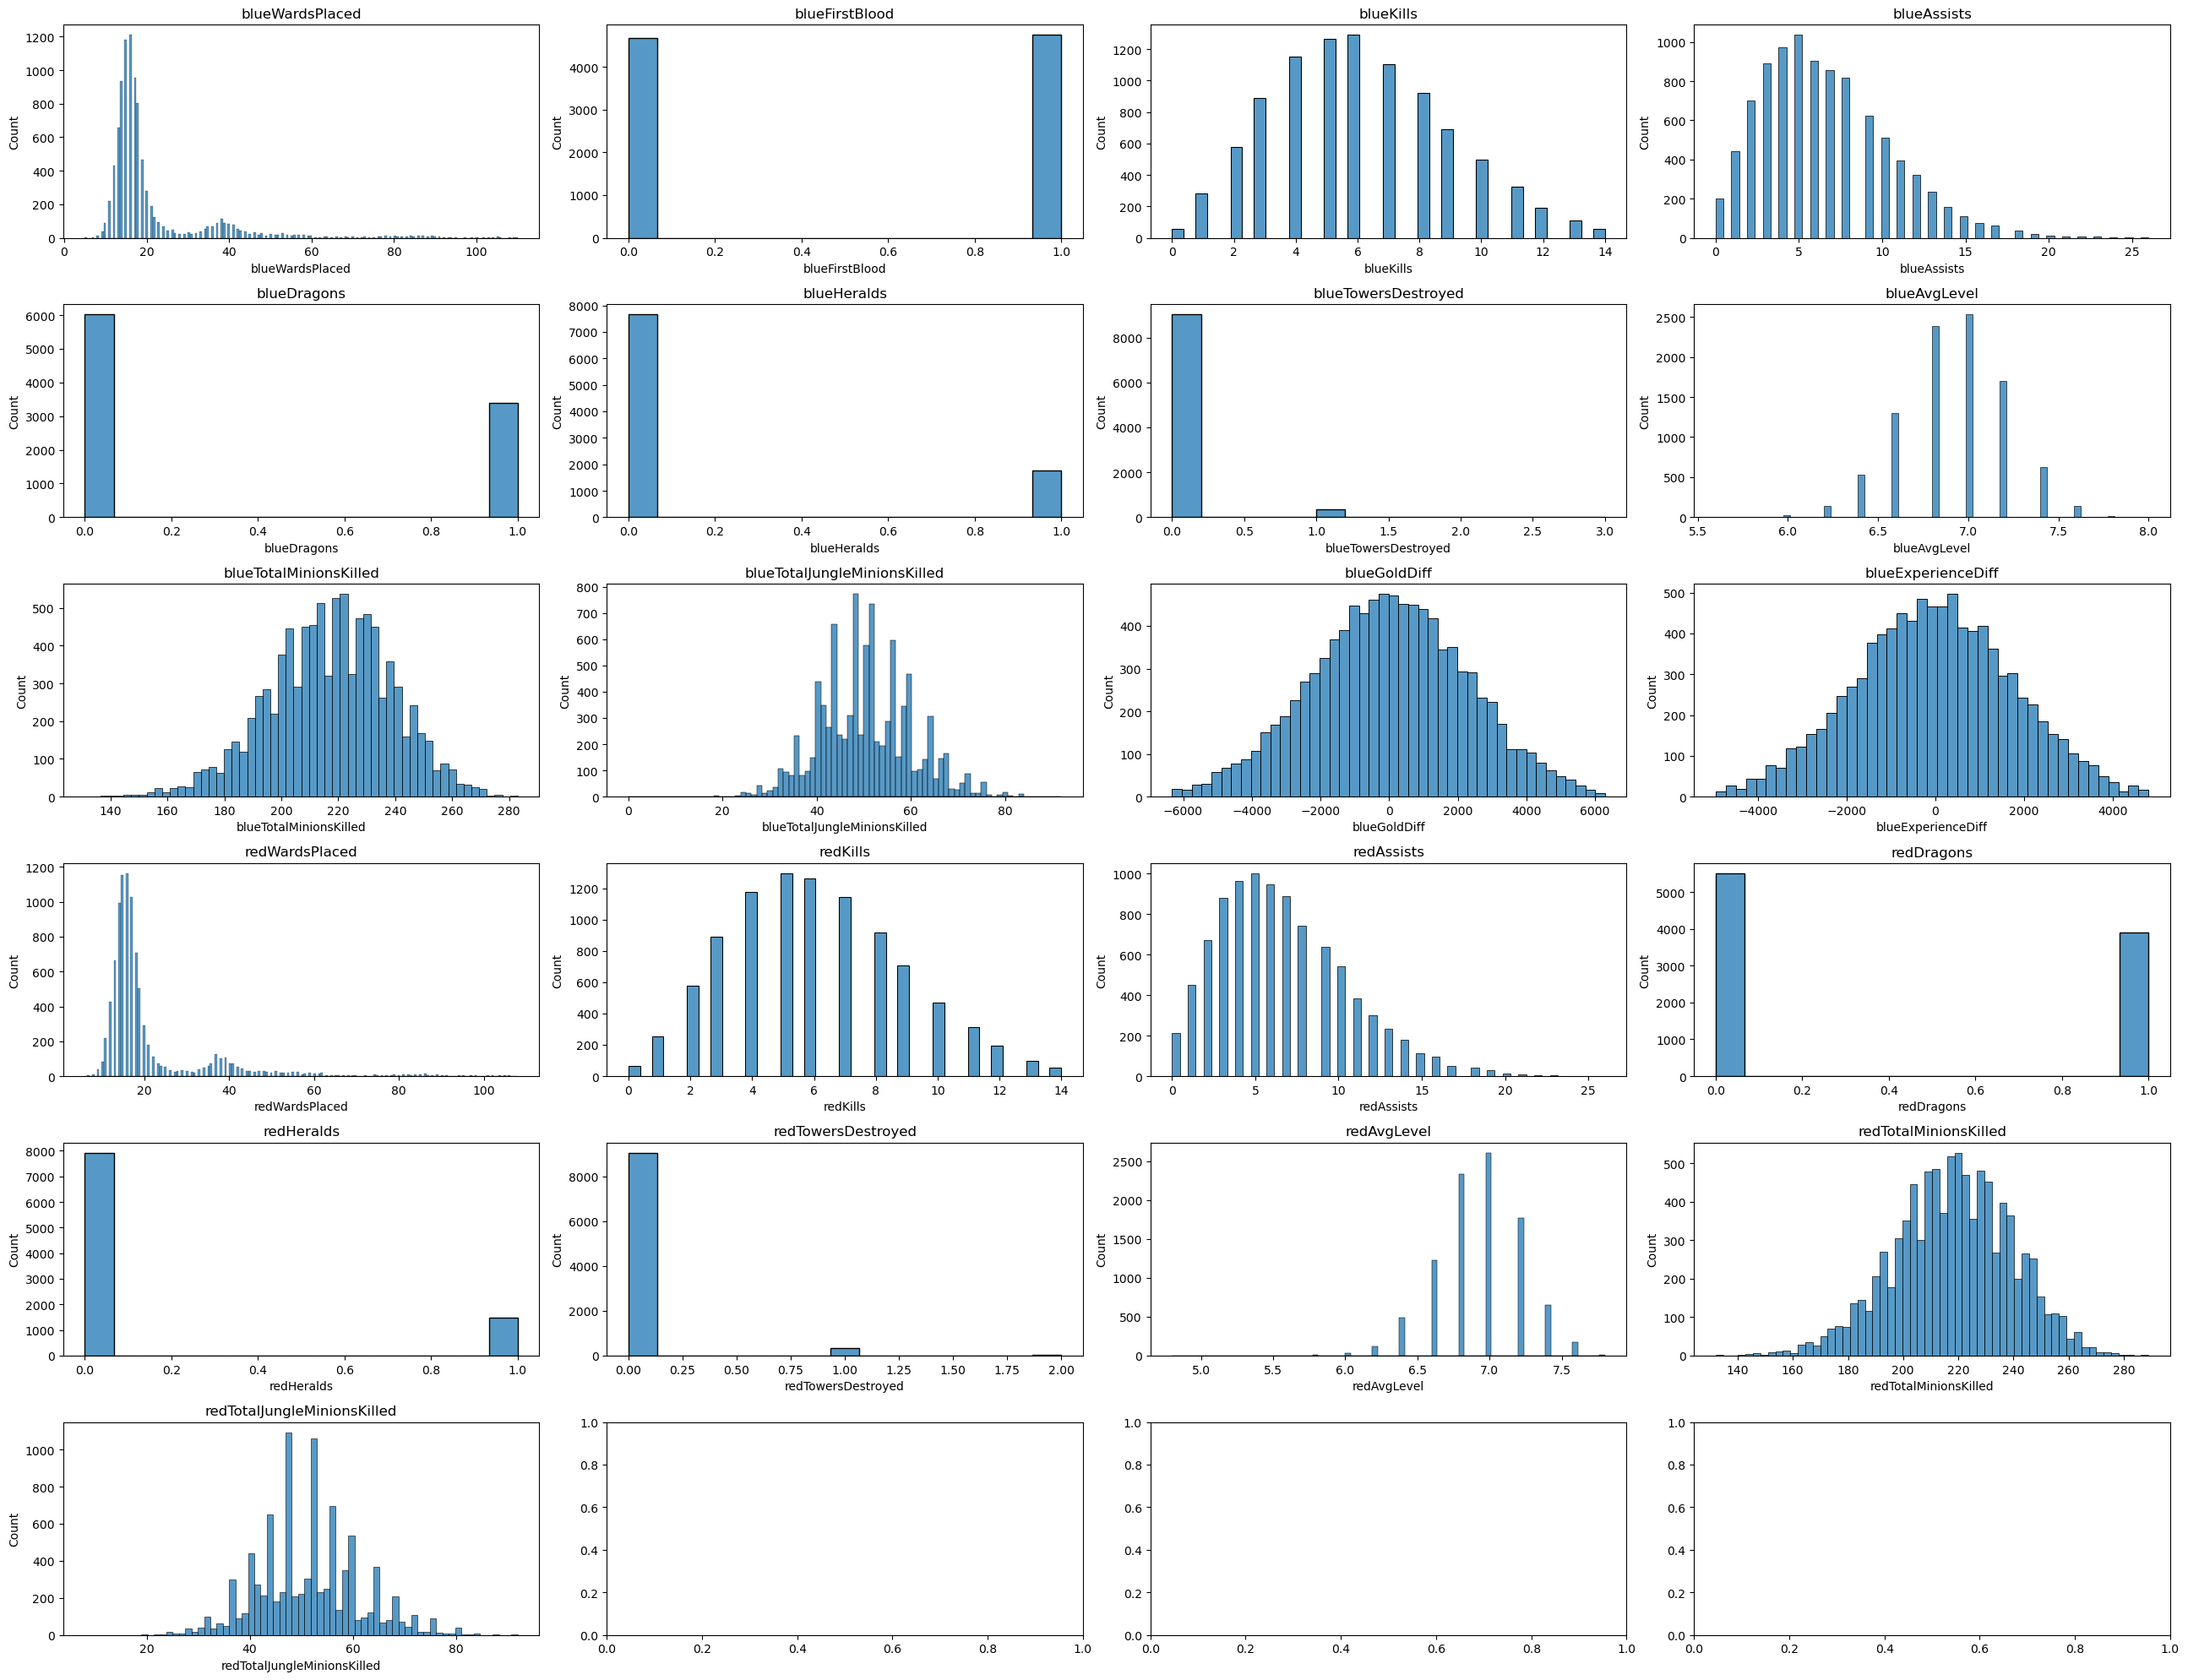

In [163]:
fig, axes = plt.subplots(6,4,figsize=(26,20))

for i, c in enumerate(dataset.columns[1:]):
    ax = axes.reshape(-1)[i]
    if dataset[c].dtype.kind == 'O': # If categorical
        a = sns.countplot(x=c,data=dataset,ax=ax, color='green')
    else: # If numerical
        b = sns.histplot(x=c,data=dataset,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

### 3.2.1 Data Types treatment

Como hemos explicado anteriormente, las variables que consideraremos categóricas seran *blueFirstBlood*, *blueDragons*, *blueHeralds*, *redDragons* y *redHeralds*. Tmabién se había mencionado la existencia de otras variables como *blueTowersDestroyed* que podrían ser consideradas categóricas pero que por el momneto no sería el caso ya que si que existe un orden de magnitud entre las distintas posibles categorías.

In [164]:
categorical_columns = ['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons' , 'redHeralds']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

dataset.dtypes

blueWins                           int64
blueWardsPlaced                    int64
blueFirstBlood                  category
blueKills                          int64
blueAssists                        int64
blueDragons                     category
blueHeralds                     category
blueTowersDestroyed                int64
blueAvgLevel                     float64
blueTotalMinionsKilled             int64
blueTotalJungleMinionsKilled       int64
blueGoldDiff                       int64
blueExperienceDiff                 int64
redWardsPlaced                     int64
redKills                           int64
redAssists                         int64
redDragons                      category
redHeralds                      category
redTowersDestroyed                 int64
redAvgLevel                      float64
redTotalMinionsKilled              int64
redTotalJungleMinionsKilled        int64
dtype: object

### 3.2.2 Encoding


### 3.2.3 Standardization

Para que nuestro modelo no se "fije" únicamente en las variables con valores más extremos vamos a estandarizar todas las variables a excepción de las que hemos designado como categóricas. El proceso de estandarización dada una variable X es el siguiente:

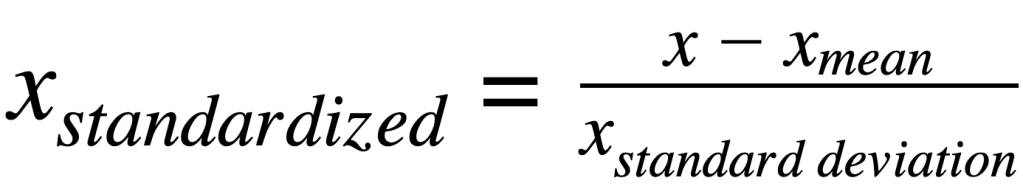

In [165]:
Image(filename='standarization.png')

In [166]:
categorical_columns = ['blueWins','blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons' , 'redHeralds']

columns = dataset.columns.tolist()

columns_to_standarize = [col for col in columns if col not in categorical_columns]

Utilizaremos la función de escalado estándar que nos ofrece la librería *sklearn*.

In [167]:
scaler = StandardScaler()

stdata = dataset
stdata[columns_to_standarize] = scaler.fit_transform(stdata[columns_to_standarize])



## 3.3 Data Visualization

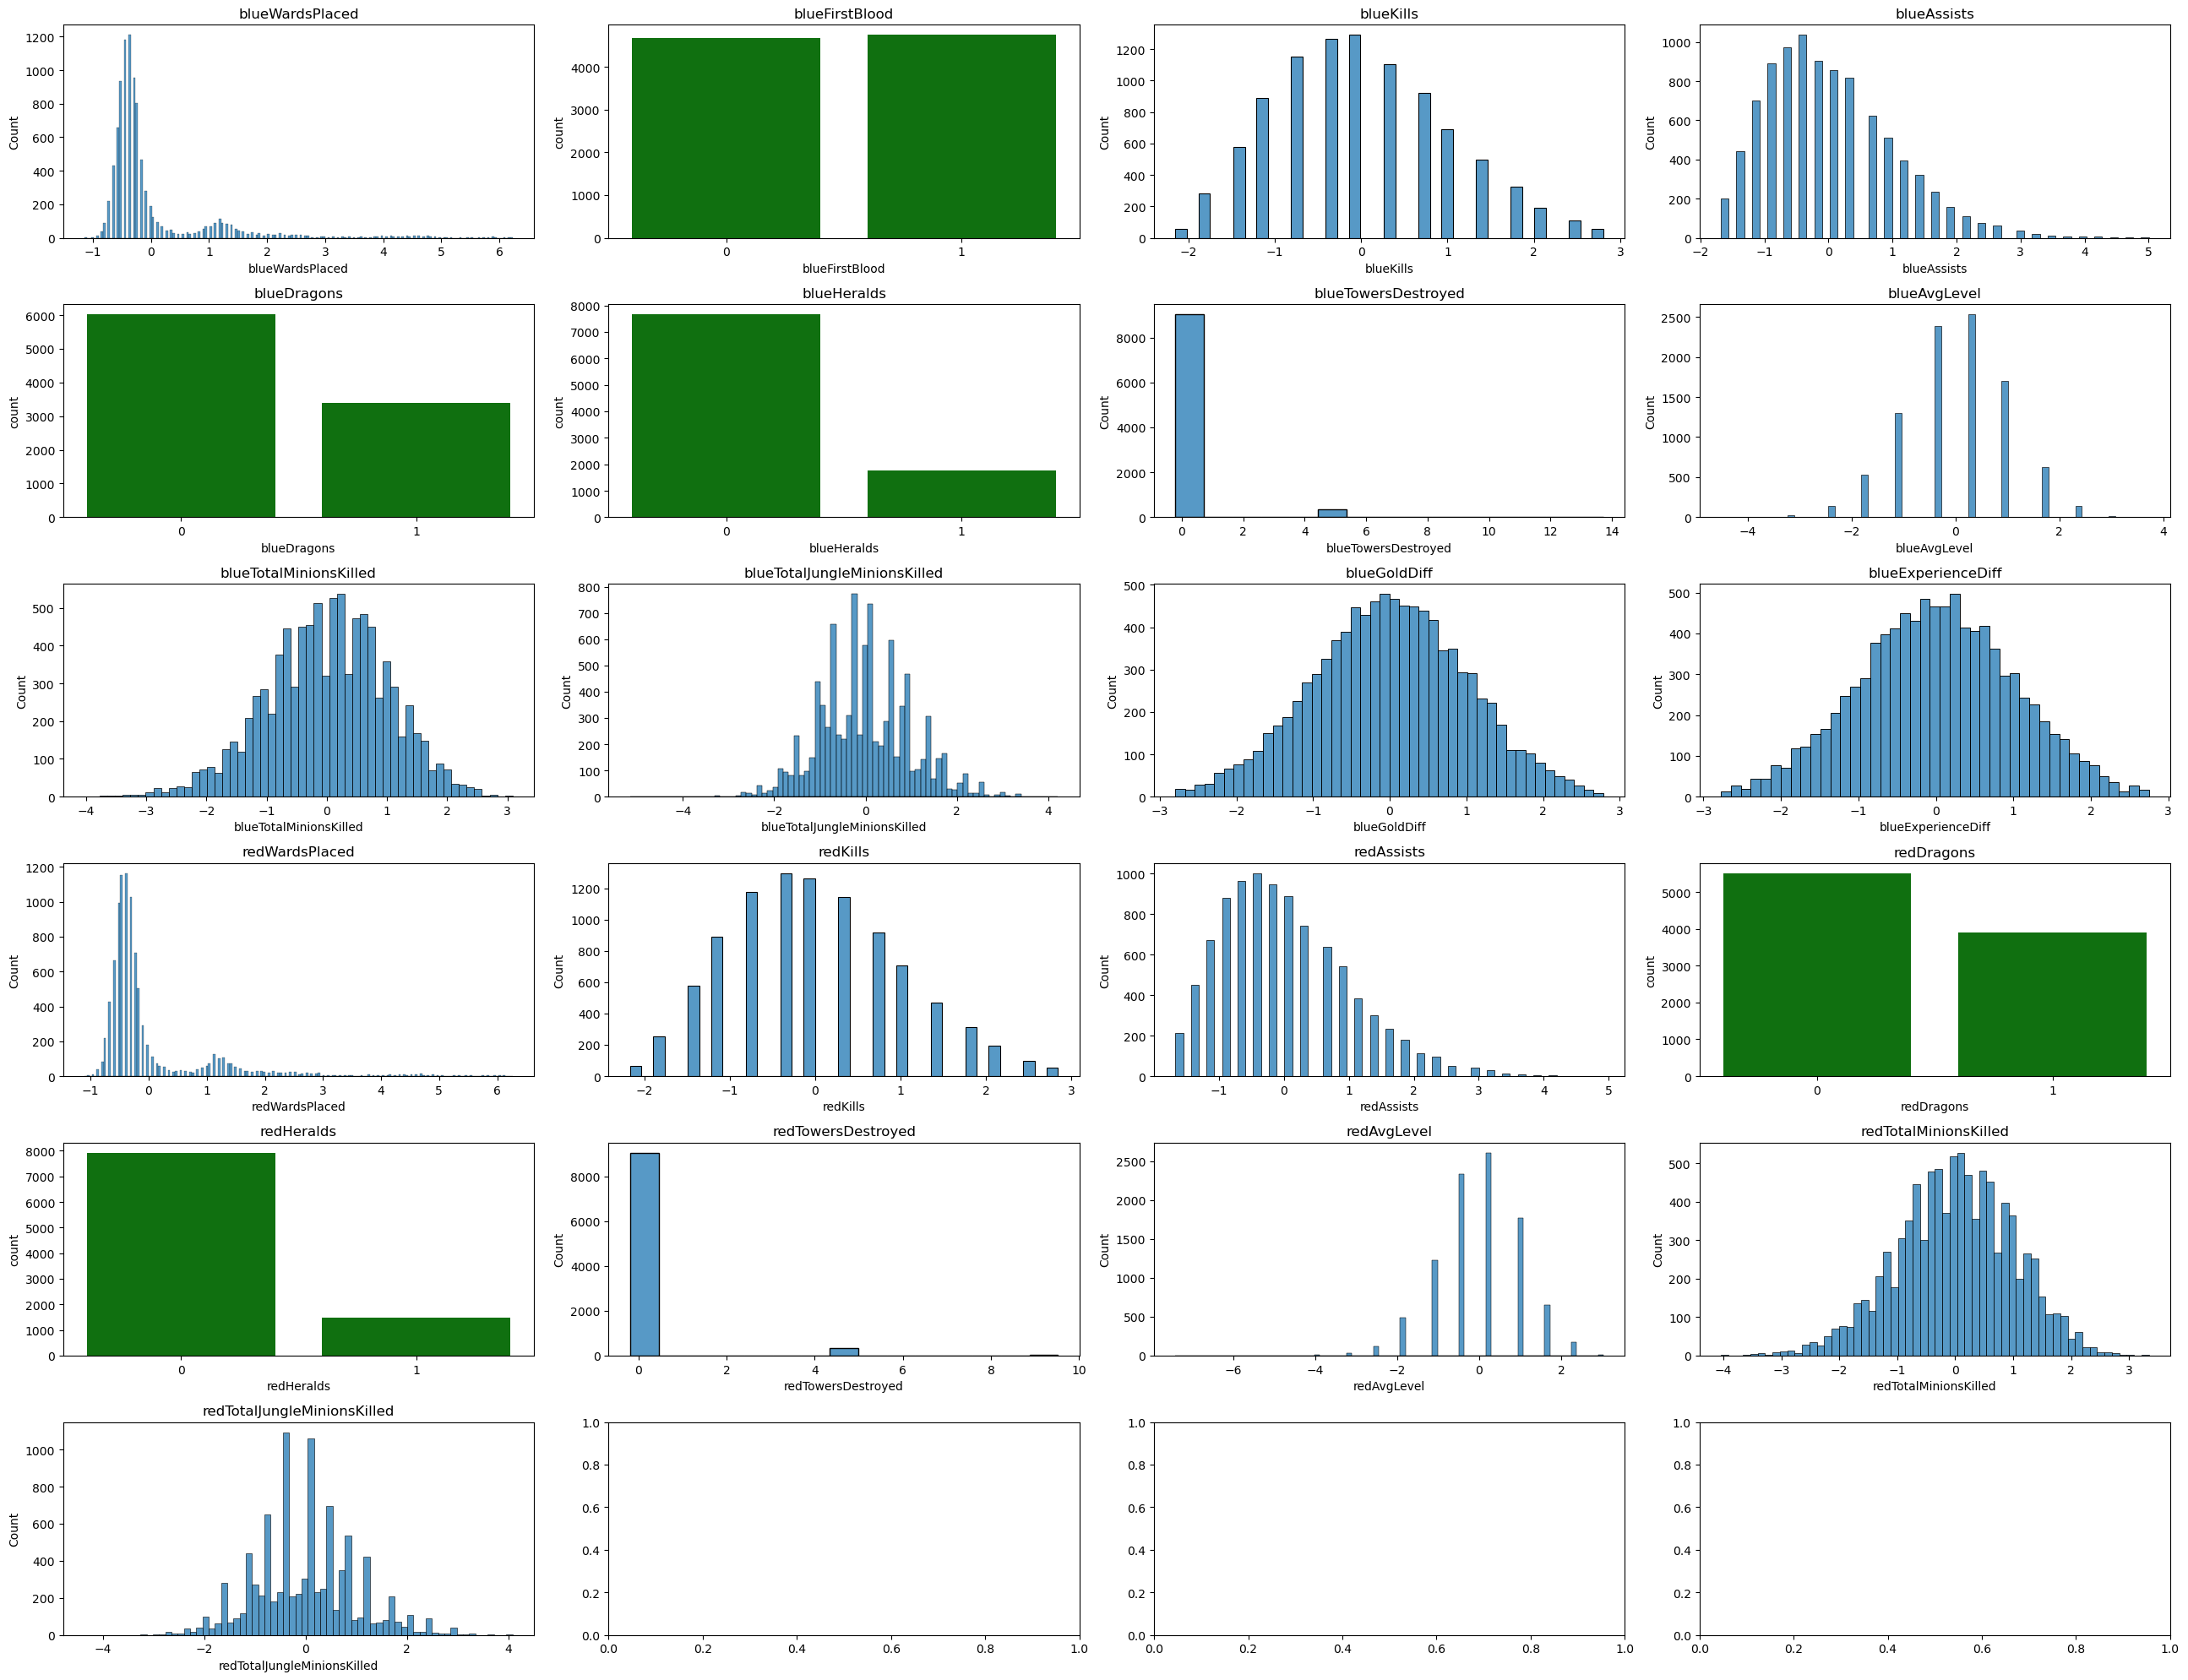

In [172]:
fig, axes = plt.subplots(6,4,figsize=(26,20))

for i, c in enumerate(dataset.columns[1:]):
    ax = axes.reshape(-1)[i]
    if dataset[c].dtype.kind == 'O': # If categorical
        a = sns.countplot(x=c,data=dataset,ax=ax, color='green')
    else: # If numerical
        b = sns.histplot(x=c,data=dataset,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

# 4. Model Building

# 5. PRUEBAS

In [169]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [170]:
# y = dtclean.blueWins
# drop_cols = ['blueWins']
# x = dtclean.drop(drop_cols, axis=1)
# X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

In [171]:
# from prettytable import PrettyTable
# table = PrettyTable()
# table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']
# def get_confusion_matrix(algorithm, y_pred, y_actual):
#     # Create confusion matrix and interpret values
#     con = confusion_matrix(y_test, y_pred)
#     tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
#     algorithm = algorithm
#     accuracy = (tp + tn) / (tp + tn + fp + fn)
#     recall = tp / (tp + fn)
#     precision = tp / (tp + fp)
#     f_score = (2 * precision * recall) / (recall + precision)
#     return algorithm, accuracy, recall, precision, f_score